# KNN Regresor

## Configuración de ambiente

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Ejemplo base

### Sin escalamiento

Error Cuadrático Medio (MSE): 658.84
Coeficiente de Determinación (R²): 0.92


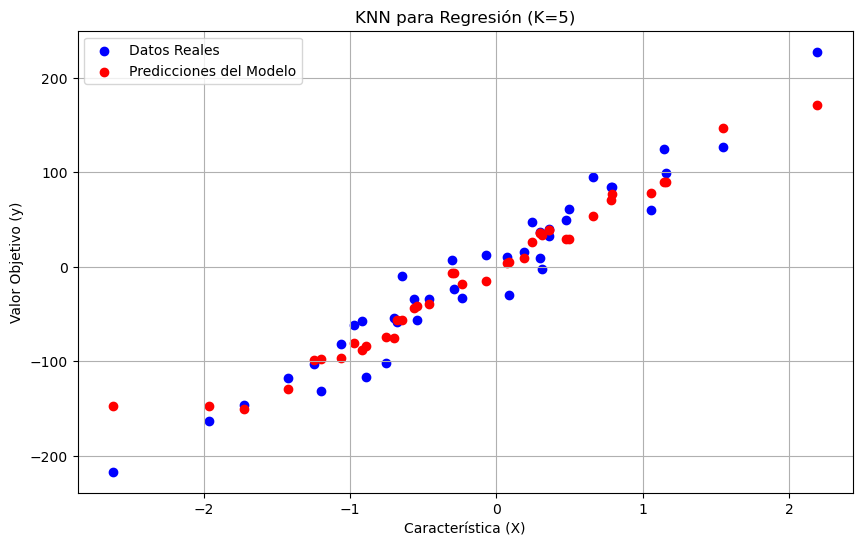

In [2]:
# Generar un dataset sintético para regresión
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
knn_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Visualizar los datos y la predicción del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones del Modelo')
plt.xlabel('Característica (X)')
plt.ylabel('Valor Objetivo (y)')
plt.title('KNN para Regresión (K=5)')
plt.legend()
plt.grid()
plt.show()


### Con escalamiento

Error Cuadrático Medio (MSE): 658.84
Coeficiente de Determinación (R²): 0.92
Error Cuadrático Absoluto (MAE): 20.62


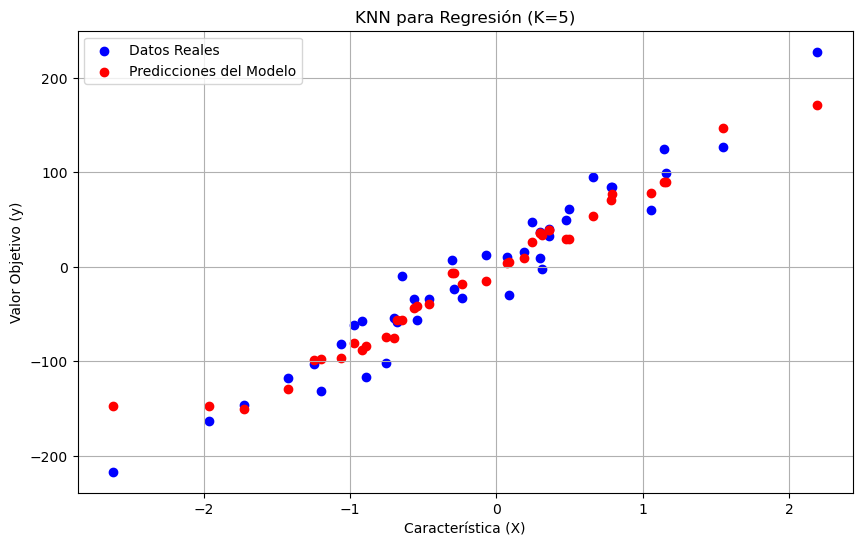

In [ ]:
# Generar un dataset sintético para regresión
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Cuadrático Absoluto (MAE): {mae:.2f}")

# Visualizar los datos y la predicción del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones del Modelo')
plt.xlabel('Característica (X)')
plt.ylabel('Valor Objetivo (y)')
plt.title('KNN para Regresión (K=5)')
plt.legend()
plt.grid()
plt.show()


## Ejemplo con dataset Kaggle: 

### Descripción del dataset Kaggle: 

Data Set Characteristics:

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
    MedInc median income in block group

    HouseAge median house age in block group

    AveRooms average number of rooms per household

    AveBedrms average number of bedrooms per household

    Population block group population

    AveOccup average number of household members

    Latitude block group latitude

    Longitude block group longitude

Missing Attribute Values: None


Este conjunto de datos se obtuvo del repositorio StatLib. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

La variable de destino es el valor medio de las viviendas en los distritos de California, expresado en cientos de miles de dólares (100 000 dólares).

Este conjunto de datos se derivó del censo de los EE. UU. de 1990, utilizando una fila por grupo de bloques del censo. Un grupo de bloques es la unidad geográfica más pequeña para la que la Oficina del Censo de los EE. UU. publica datos de muestra (un grupo de bloques normalmente tiene una población de entre 600 y 3000 personas).

Un hogar es un grupo de personas que residen en una casa. Dado que la cantidad promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden adoptar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como los complejos turísticos

### Análisis de las variables explicativas y sus distribuciones

In [4]:
# Cargar el dataset California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
print(X.shape)
print(X.columns)
X.head()

(20640, 8)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

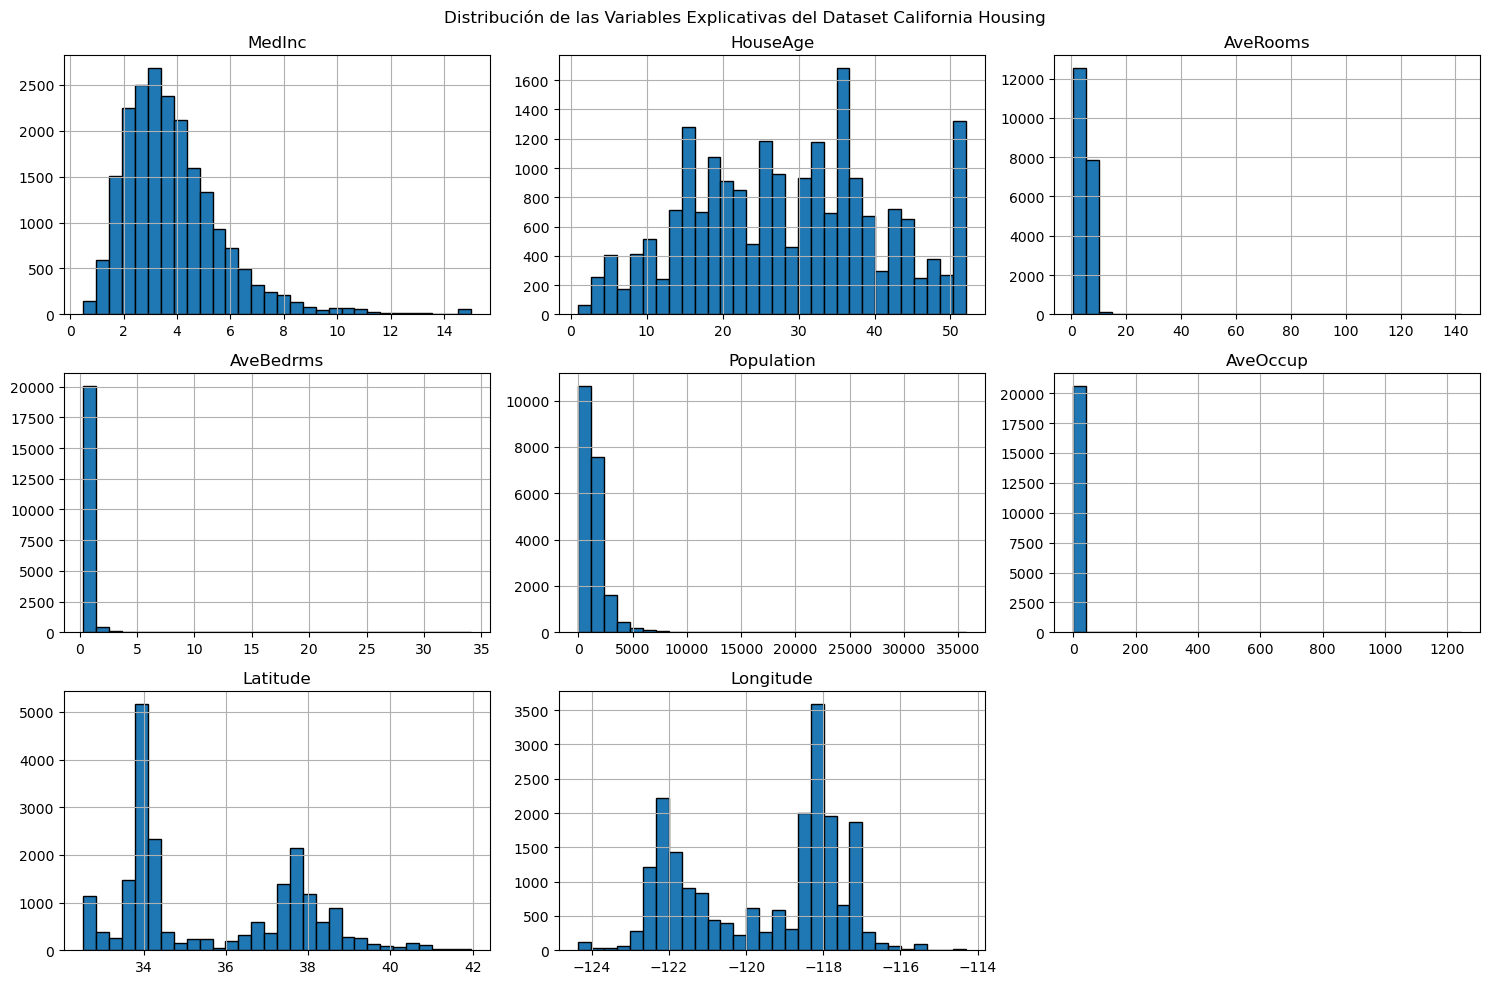

In [5]:
print(X.describe())
# Crear histogramas para cada característica
X.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

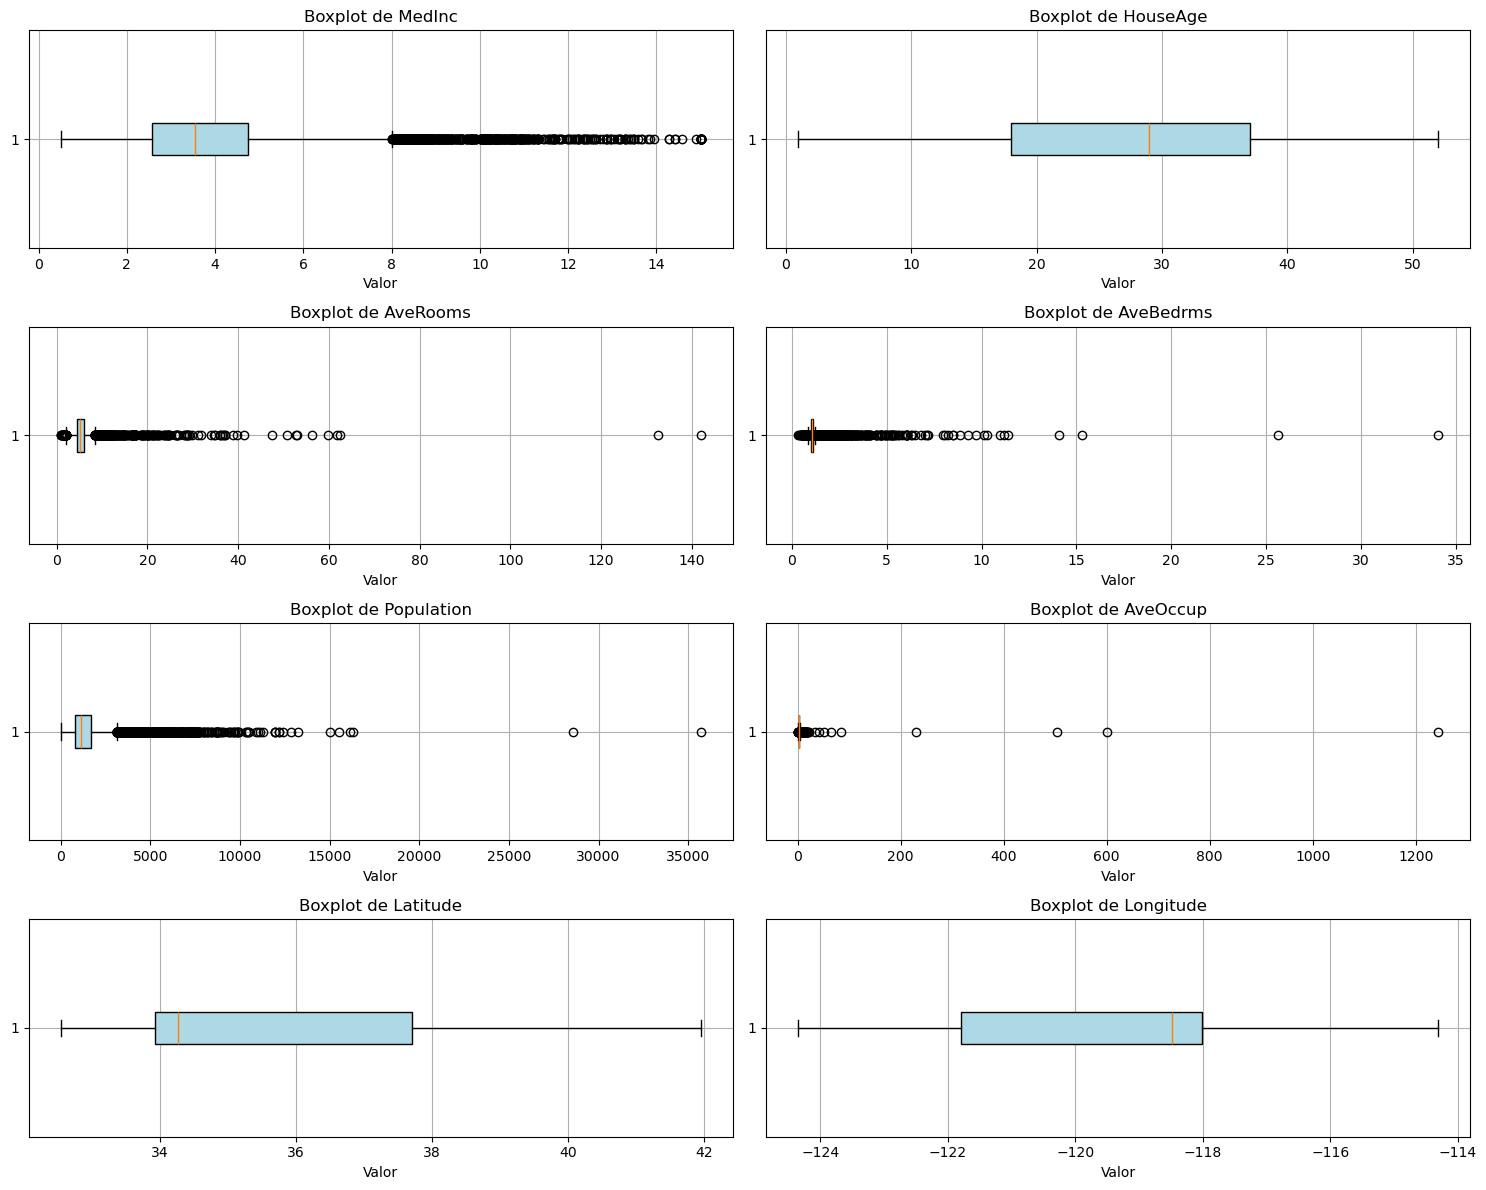

In [6]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(X.columns):
    axes[i].boxplot(X[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

### Modelo

Error Cuadrático Medio (MSE): 0.42
Coeficiente de Determinación (R²): 0.68
Error Absoluto medio (MAE): 0.45


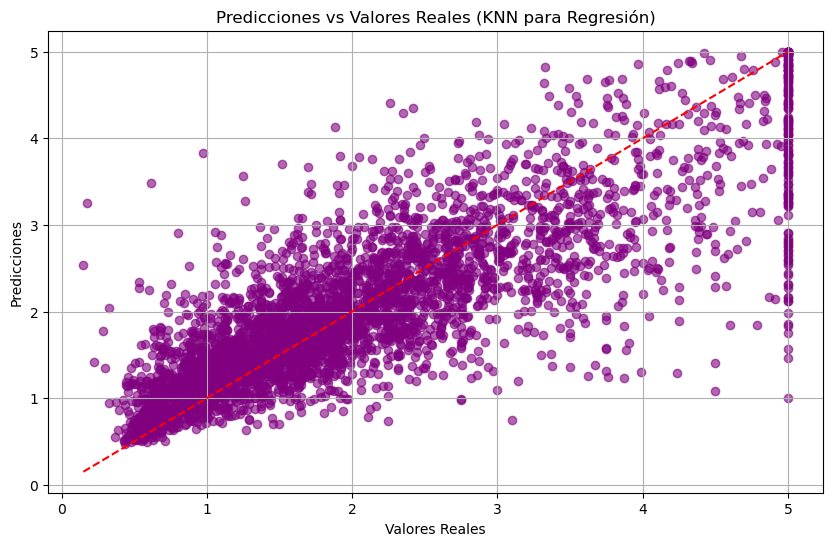

In [7]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Ajustar el modelo a los datos escalados
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Absoluto medio (MAE): {mae:.2f}")


# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN para Regresión)')
plt.grid()
plt.show()


### Análisis del error

In [8]:
# ejemplo de cálculo manual de MAE
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test['y_diff'] = abs(X_test['y_pred'] - X_test['y_test'])
X_test['real_price_error'] = X_test['y_diff'] * 100000
print(X_test['y_diff'].mean())
X_test.head()

0.4526702151162791


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y_pred,y_test,y_diff,real_price_error
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.49140,0.47700,0.0144,1440.0
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,1.24720,0.45800,0.7892,78920.0
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,5.00001,0.0000,0.0
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.26740,2.18600,0.0814,8140.0
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.15300,2.78000,0.6270,62700.0


count      4128.000000
mean      45267.021512
std       46903.301698
min           0.000000
25%       13480.000000
50%       31570.000000
75%       60495.200000
max      399341.000000
Name: real_price_error, dtype: float64


<Axes: >

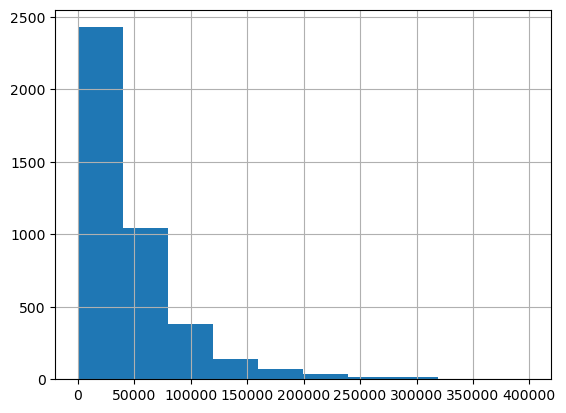

In [9]:
print(X_test['real_price_error'].describe())
X_test['real_price_error'].hist()

count      4128.000000
mean     205500.309593
std      114486.964288
min       14999.000000
25%      119275.000000
50%      178650.000000
75%      263000.000000
max      500001.000000
Name: real_price, dtype: float64


<Axes: >

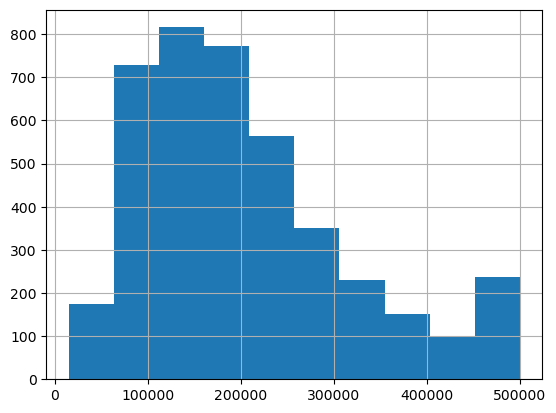

In [10]:
X_test['real_price'] = X_test['y_test'] * 100000
print(X_test['real_price'].describe())
X_test['real_price'].hist()

### Optimización del K

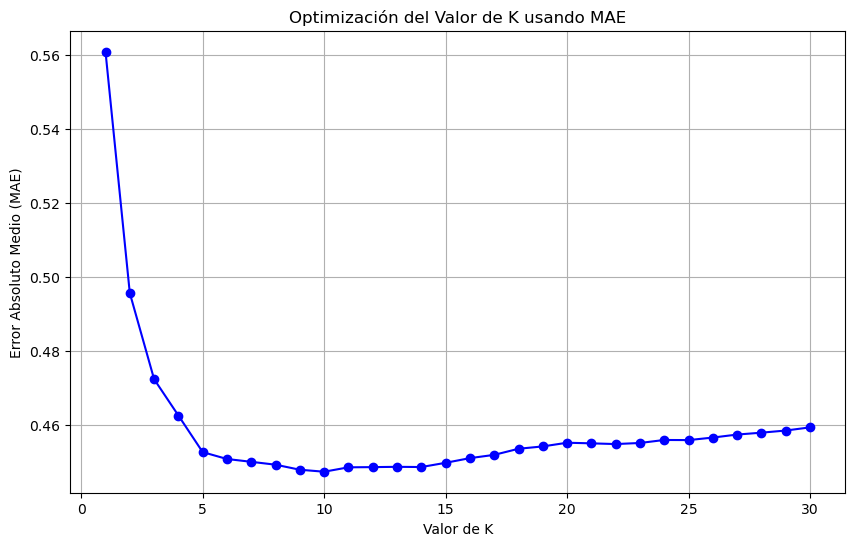

El mejor valor de K basado en MAE es: 10


In [11]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista para almacenar los errores MAE
mae_list = []

# Probar diferentes valores de K
k_values = range(1, 31)
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# Graficar el MAE para diferentes valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mae_list, marker='o', color='b')
plt.xlabel('Valor de K')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.title('Optimización del Valor de K usando MAE')
plt.grid()
plt.show()

# Obtener el mejor valor de K basado en el MAE mínimo
best_k = k_values[np.argmin(mae_list)]
print(f"El mejor valor de K basado en MAE es: {best_k}")


Error Cuadrático Medio (MSE): 0.41
Coeficiente de Determinación (R²): 0.69
Error Absoluto medio (MAE): 0.45


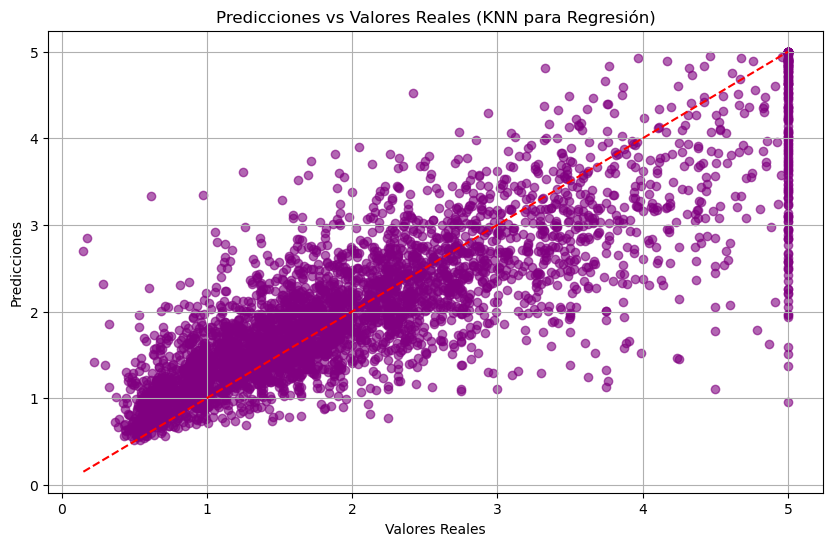

In [12]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# Ajustar el modelo a los datos escalados
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Absoluto medio (MAE): {mae:.2f}")


# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN para Regresión)')
plt.grid()
plt.show()